In [35]:
# import standard libraries
# импортирую стандартные библиотеки
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# import models and metrics
# импортирую модели и метрики
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
# Есть исходный файл. Из него надо выделить тренировочный датасет и тестовый датасет
# разбиение будет в пропорции 85 на 15

df = pd.read_csv('diamonds.csv')
df['split'] = np.random.randn(df.shape[0], 1)

temp1 = np.random.rand(len(df)) <= 0.85

train = df[temp1]
test = df[~temp1]

#можно удалить ненужные столбцы
train.drop('split', axis= 1 , inplace= True )
test.drop('split', axis= 1 , inplace= True )

#определим ценль
target = train['price']

C:\Users\PC\AppData\Local\Temp\ipykernel_19276\4096837131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('split', axis= 1 , inplace= True )
C:\Users\PC\AppData\Local\Temp\ipykernel_19276\4096837131.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('split', axis= 1 , inplace= True )


In [37]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45982 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45982 non-null  int64  
 1   carat       45982 non-null  float64
 2   cut         45982 non-null  object 
 3   color       45982 non-null  object 
 4   clarity     45982 non-null  object 
 5   depth       45982 non-null  float64
 6   table       45982 non-null  float64
 7   price       45982 non-null  int64  
 8   x           45982 non-null  float64
 9   y           45982 non-null  float64
 10  z           45982 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.2+ MB


In [38]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7958 entries, 11 to 53927
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7958 non-null   int64  
 1   carat       7958 non-null   float64
 2   cut         7958 non-null   object 
 3   color       7958 non-null   object 
 4   clarity     7958 non-null   object 
 5   depth       7958 non-null   float64
 6   table       7958 non-null   float64
 7   price       7958 non-null   int64  
 8   x           7958 non-null   float64
 9   y           7958 non-null   float64
 10  z           7958 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 746.1+ KB


In [39]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
32,33,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
36,37,0.23,Good,E,VS1,64.1,59.0,402,3.83,3.85,2.46
38,39,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52
42,43,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61


In [41]:
#корректное название для столбца
train.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )
test.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )

C:\Users\PC\AppData\Local\Temp\ipykernel_19276\2646363118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )
C:\Users\PC\AppData\Local\Temp\ipykernel_19276\2646363118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns = {'Unnamed: 0':'ID'}, inplace = True )


In [30]:
# target variable
train['price'].describe()

count    45863.000000
mean      3951.087631
std       3999.325704
min        326.000000
25%        953.000000
50%       2423.000000
75%       5365.000000
max      18823.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

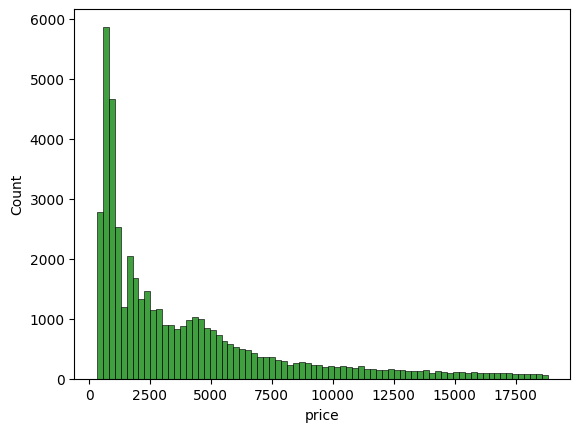

In [42]:
# visualisation of 'price' distribution  
sns.histplot(train['price'], color='g')

In [45]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')


,carat,cut,color,clarity,depth,table,price,x,y,z
ID,,,,,,,,,,
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
33,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
37,0.23,Good,E,VS1,64.1,59.0,402,3.83,3.85,2.46
39,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52
43,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
